# MNIST and NN model insterpretation?

In this exercise we will work with a full size version of the MNIST dataset of handwritten digits.

In [ ]:
import tensorflow as tf
color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]

(X_train, y_train), (X_val, y_val) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


* Check out the shape of X_train

(60000, 28, 28)

* Visualize one element from this dataset

* This data shape won't fit in a fully connected neural network, reshape the elements from the dataset so they are flat.

(60000, 784)

* The data's training variables are pixels which values range from 0 to 255, divide them by 255 so they are normalized

* Convert the train and test into tensor datasets

<TensorSliceDataset shapes: ((784,), ()), types: (tf.float64, tf.uint8)>

* Suffle the datasets and organise them by batches of 16

(<tf.Tensor: shape=(16, 784), dtype=float64, numpy=
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])>,
 <tf.Tensor: shape=(16,), dtype=uint8, numpy=array([5, 7, 3, 5, 7, 6, 4, 8, 3, 5, 6, 7, 4, 5, 7, 7], dtype=uint8)>)

* What is the effect of the batch size on the training of the model? If the batch size is equal to the number of observations, what would the batch gradient descent be equivalent to?
* With batches of 16 observations, how many times will the parameters of the model be updated before we reach one epoch?

* Create a simple neural network model, don't forget to set an input shape in the first layer that corresponds to the data we will feed the model and define the last layer so it is able to make predictions as we expect.

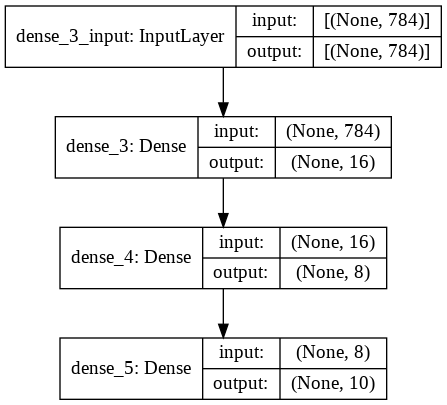

* Print your model's summary, can you understand the number of parameters on each layer?

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                90        
Total params: 12,786
Trainable params: 12,786
Non-trainable params: 0
_________________________________________________________________


* Compile the model using the right loss and metric and the Adam optimizer

* Train the model on 10 epochs

Epoch 1/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.7883 - sparse_categorical_accuracy: 0.7453 - val_loss: 0.2769 - val_sparse_categorical_accuracy: 0.9178
Epoch 2/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.2660 - sparse_categorical_accuracy: 0.9237 - val_loss: 0.2242 - val_sparse_categorical_accuracy: 0.9369
Epoch 3/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.2162 - sparse_categorical_accuracy: 0.9360 - val_loss: 0.2032 - val_sparse_categorical_accuracy: 0.9400
Epoch 4/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1930 - sparse_categorical_accuracy: 0.9447 - val_loss: 0.1890 - val_sparse_categorical_accuracy: 0.9453
Epoch 5/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1746 - sparse_categorical_accuracy: 0.9483 - val_loss: 0.2006 - val_sparse_categorical_accuracy: 0.9427
Epoch 6/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1600 - spars

* Would you say the model achieved good performance? Did it overfit?

* Get the weights from the first layer

<tf.Variable 'dense_3/kernel:0' shape=(784, 16) dtype=float32, numpy=
array([[ 0.08032601,  0.01401325, -0.00551517, ..., -0.08292197,
        -0.0447561 , -0.02352133],
       [-0.04324455,  0.03598977,  0.05161659, ..., -0.07796179,
         0.08255993,  0.04159398],
       [ 0.07883398, -0.00593651, -0.07968384, ..., -0.08154219,
        -0.03084956, -0.03658064],
       ...,
       [-0.06921841,  0.05605766,  0.05544898, ..., -0.01115134,
        -0.03726359,  0.05764447],
       [ 0.08065104,  0.06549327, -0.04674988, ...,  0.01552344,
         0.02545271, -0.03891984],
       [-0.05530753, -0.0162718 ,  0.02644368, ...,  0.07010339,
        -0.01518101,  0.05862959]], dtype=float32)>

* Extract the weights from one of the neurons on that layer, what does the number of weights correspond to?

(784,)

* Reshape the weights to form a 28x28 image and display it, can you interpret the weights on this neuron?

* Try the same thing with all the neurons of the first layer, can you see something interpretable? Youcan find help <a href="https://plotly.com/python/heatmaps/"> here </a> and <a href="https://plotly.com/python/subplots/"> here </a>.

* Do the same visualization but apply relu to the weights

* The parameters on each of the neurons of the first layer let's you see what information the first layer of the network is taking from the data to create new features, it would also be possible to analyse the features from the second layer by combining those parameters thanks to the weights of the second layer.

* Apply relu to this new level of feature to see what goes to the last layer

* Bottomline is it's quite hard to understand how the model is making predictions, from what we see it's picking up some details about borders or contrasts at the edge of numbers, but it does not seem that the model is percieving numbers the way our brain does!
* Do not worry though, tensorflow has tools that make it easy to see what elements of the images are used to make the predictions, we will see this in what follows.